<h1 style='color: green; font-size: 36px; font-weight: bold;'>Machine Learning - Regresión lineal</h1>

<h2 style='color: green; font-size: 36px; font-weight: bold;'>Modelo de predicción para el consumo medio de cerveza en un grupo de estudio</h2>

**Del proyecto:** 231102-1_ml_regresion_lineal_correlaciones

**Procedimientos:**
1. Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab
2. Cargar el dataset en un DataFrame
3. Consultar información sobre las variables del Dataframe

# <font color='red' style='font-size: 30px;'>Conociendo el Dataset</font>
<hr style='border: 2px solid red;'>

### El Dataset y el Proyecto
<hr>

### Fuente: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

### Descripción:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>La cerveza es una de las bebidas más democráticas y consumidas del mundo. No sin razón, es perfecta para casi todas las situaciones, desde el happy hour hasta las grandes fiestas de bodas.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El objetivo de este proyecto es estimar un modelo de <b>Machine Learning</b> utilizando la técnica de <b>Regresión Lineal</b> para demostrar los impactos de las variables disponibles en este dataset sobre el consumo de cerveza (Y). Al final del proyecto, tendremos un modelo de predicción para el consumo medio de cerveza según los inputs de un conjunto de variables (X's).</p>


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los datos (muestra) fueron recolectados en São Paulo - Brasil, en un área universitaria, donde hay algunas fiestas con grupos de estudiantes de 18 a 28 años (en media).</p>

### Datos:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>fecha</b> - Fecha</li>
    <li><b>temp_media</b> - Temperatura Media (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>lluvia</b> - Precipitación (mm)</li>
    <li><b>fds</b> - Fin de Semana (1 = Sí; 0 = No)</li>
    <li><b>consumo</b> - Consumo de Cerveza (litros)</li>
</ul>

### 1. **Preparar el entorno de desarrollo en el cuaderno de Jupiter para Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

¿Cómo pasar la ruta del archivo dataset cuando hay espacios en blanco en nombres de la ruta?
Respuesta: Convertir a una cadena de caracteres encerrando entre comillas simples o dobles toda la ruta incluyendo el nombre del archivo

In [ ]:
pip install -r "/content/drive/MyDrive/Colab Notebooks/231102-1_machine_learning_regresion_lineal_correlaciones/requirements.txt"

In [3]:
# import libraries
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.cluster import KMeans

# **ImportError: The plotly.plotly module is deprecated, Solution : use the chart_studio.plotly module instead. **
import chart_studio.plotly as py
import plotly.graph_objs as go

# Runtime error: chart is displayed blank.
# When using Google Colab use the overall import statements below, this will set the rendering to Colab style and the plots will be displayed.
import plotly.offline as pyoff
#initiate visualization library for jupyter notebook
pyoff.init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'colab'

import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [4]:
# How can I suppresed Python warnings in Jupyter Notebook
# Why not just set n_init=10 explicitly and retain the same value as the default and get rid of those warnings?
import warnings
warnings.filterwarnings('ignore') #warnings.filterwarnings('once')

### 2. **Cargar el dataset en un dataframe**

In [5]:
# ¿Cual es la manera recomendada para fijar la ruta de un archivo dataset para cargarlo en Google Colab?
# Respuesta: Asignar la ruta a un string y pasarlo como parametro al método pd.read_csv()
consumo_cerveza_data_file_path = '/content/drive/MyDrive/Colab Notebooks/231102-1_machine_learning_regresion_lineal_correlaciones/dataset/Consumo_cerveza.csv'
consumo_cerveza_df = pd.read_csv(consumo_cerveza_data_file_path,delimiter=';' )

### 3. **Consultar información sobre las variables del Dataframe**

In [6]:
# Tamaño del datset (total de registros)
consumo_cerveza_df.shape[0]

365

In [7]:
# Nombres, tipos de datos y cantidad e valores no nulos de las variables que conforman el data set
consumo_cerveza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fecha       365 non-null    object 
 1   temp_media  365 non-null    float64
 2   temp_min    365 non-null    float64
 3   temp_max    365 non-null    float64
 4   lluvia      365 non-null    float64
 5   fds         365 non-null    int64  
 6   consumo     365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


In [8]:
# Nos conviene más adelante tratar la variable fecha de tipo fecha y no de tipo cadena de caracteres
# consumo_cerveza_df['fecha'] = pd.to_datetime(consumo_cerveza_df['fecha'])
# consumo_cerveza_df.dtypes

In [9]:
# Vista parcial de los datos
consumo_cerveza_df.head()

,fecha,temp_media,temp_min,temp_max,lluvia,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


# <font color='red' style='font-size: 30px;'>Analisis preliminar</font>

<hr style='border: 2px solid red;'>

## Estadísticos descriptivos

In [10]:
# Medidas de tendencia central y de distribucion de las variables del dataset
consumo_cerveza_df.describe().round(2)

,temp_media,temp_min,temp_max,lluvia,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


## Matriz de correlación

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta (las dos variables evaluadas son inversamente proporcionales) y <b> +1 </b> indica asociación positiva perfecta (las dos variables evaluadas son directamente proporcionales) , un coeficiente sercano a cero indica que no hay relación de proporción.</p>

In [11]:
# Matriz de correlación
consumo_cerveza_df.corr().round(2)

,temp_media,temp_min,temp_max,lluvia,fds,consumo
temp_media,1.00,0.86,0.92,0.02,-0.05,0.57
temp_min,0.86,1.00,0.67,0.10,-0.06,0.39
temp_max,0.92,0.67,1.00,-0.05,-0.04,0.64
lluvia,0.02,0.10,-0.05,1.00,0.00,-0.19
fds,-0.05,-0.06,-0.04,0.00,1.00,0.51
consumo,0.57,0.39,0.64,-0.19,0.51,1.00


**Observaciones:**
1. La correlacion (19%) entre las variables **consumo** y **lluvia** es inversamente proporcional
2. La correlacion (64%) entre las variables **consumo** y **temperatura_máxima** es directamente proporcional.
3. Para entrenar el modelo no se usaran las variables **temperatura_minima** ni **temperatura_media** ya que hay una correlación muy fuerte (86% y 92%) entre ellas  y la **temperatura_máxima** ; ya que por ser variables explicativas esto podría crear un sesgo en los resultados arrojados.
4. Las variables **temperatura_máxima**,		**fin_de_semana** y	**consumo** son las escogidas para el estudio y posterior entrenamiento del modelo debido a que sus respectivos valores de correlacion son bajos entre si.

# <font color='red' style='font-size: 30px;'>Comportamiento de la variable dependiente (Y)</font>
<hr style='border: 2px solid red;'>

# Análisis grafico

## Dibujando el plot de la variable *dependiente* (y)
https://pandas.pydata.org/pandas-docs/stable/visualization.html

Text(0.5, 0, 'Días')

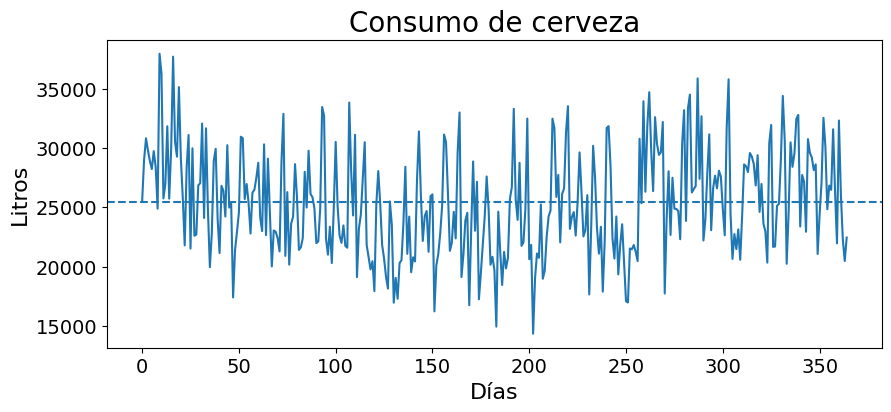

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
ax = consumo_cerveza_df['consumo'].plot( fontsize= 14)
ax.axhline(y=np.mean(consumo_cerveza_df['consumo']),ls= '--')
ax.set_title('Consumo de cerveza', fontsize=20)
ax.set_ylabel('Litros', fontsize= 16)
ax.set_xlabel('Días', fontsize= 16)

**Observación:** Según el grafico y en relación con la media (linea punteada) podemos inferir que el comportamiento del historico de los datos es estacional y no tiene una ruptura estructural.

# <font color='red' style='font-size: 30px;'>Box Plot (Diagrama de caja)</font>



<hr style='border: 2px solid red;'>

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

## Importando la biblioteca seaborn
https://seaborn.pydata.org/
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Seaborn es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos.</p>

## Box plot de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<Axes: title={'center': 'Consumo de cerveza'}, ylabel='Litros'>

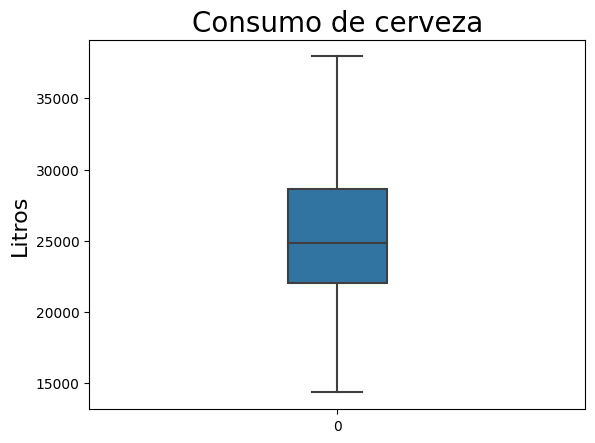

In [ ]:
# Asignar el grafico a un objeto (ax) permite personalizarlo
ax=sns.boxplot(consumo_cerveza_df['consumo'], orient='v', width=0.2)
ax.set_title('Consumo de cerveza', fontsize=20)
ax.set_ylabel('Litros', fontsize = 16)
ax

**Observación:** El gráfico de distribución es simetrico  lo indica que se trata de una distribución normal

# <font color='red' style='font-size: 30px;'>Box Plot con Dos Variables</font>
<hr style='border: 2px solid red;'>

## Analizar la variable *dependiente* (y) de acuerdo con una característica dada

<Axes: title={'center': 'Consumo de cerveza'}, xlabel='Fines de semana', ylabel='Litros'>

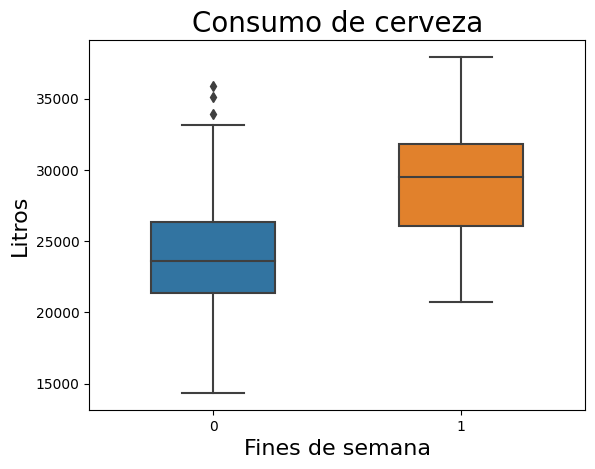

In [ ]:
 # Analizaremos la variable dependiente y=consumo a partir de la variable categorica fds (fin de semana)
ax=sns.boxplot(y='consumo',x='fds',data=consumo_cerveza_df, orient='v', width=0.5)
ax.set_title('Consumo de cerveza', fontsize=20)
ax.set_ylabel('Litros', fontsize = 16)
ax.set_xlabel('Fines de semana', fontsize = 16)
ax

## Configuración de color y estilo de la biblioteca *seaborn*

### Control de estilo

> ####  API
> https://seaborn.pydata.org/api.html#style-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

### Paleta de colores

> #### API
> https://seaborn.pydata.org/api.html#palette-api

> #### Tutorial
> https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [ ]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')


<Axes: title={'center': 'Consumo de cerveza'}, xlabel='Fines de semana', ylabel='Litros'>

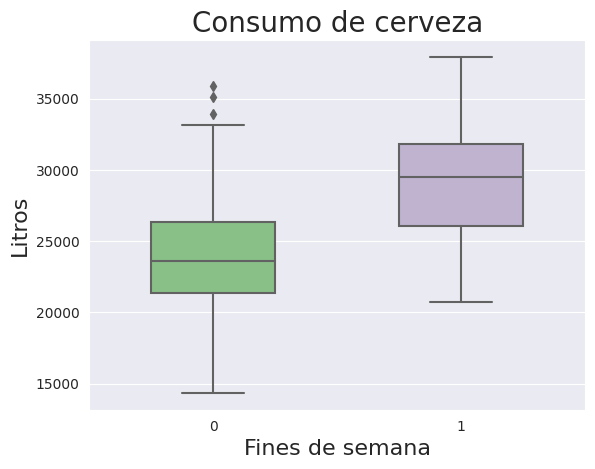

In [ ]:
ax=sns.boxplot(y='consumo',x='fds',data=consumo_cerveza_df, orient='v', width=0.5)
ax.set_title('Consumo de cerveza', fontsize=20)
ax.set_ylabel('Litros', fontsize = 16)
ax.set_xlabel('Fines de semana', fontsize = 16)
ax

 Esta técnica de visualización de construir boxplots cruzando información de dos variables en nuestro dataset nos ayuda a identificar diferencias en la distribución de una variable cuando la separamos en ciertas categorías.

# <font color='red' style='font-size: 30px;'>Distribución de frecuencias (Histograma)</font>
<hr style='border: 2px solid red;'>

## Distribución de frecuencias de la variable *dependiente* (y)

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: title={'center': 'Distribución de frecuencia'}, xlabel='consumo', ylabel='Frecuencia absoluta'>

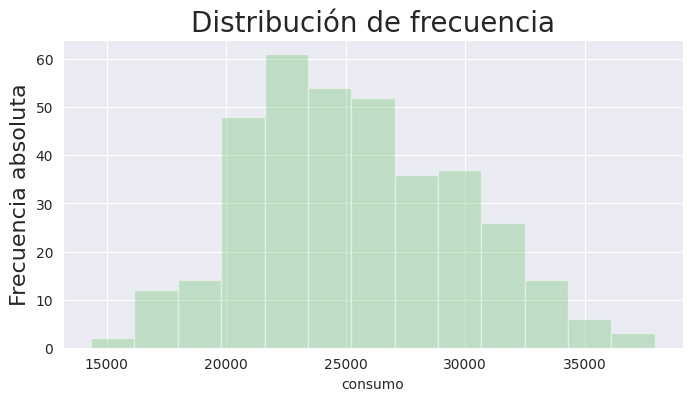

In [ ]:
# Desactivamos los parametros kde (curva de tendencia) y norm_hist (normalizar valores a frecuencia relativa)
# para mejor lectura
ax=sns.distplot(
                consumo_cerveza_df['consumo'],
                kde= False,
                norm_hist= False)
ax.figure.set_size_inches(8,4)
ax.set_title('Distribución de frecuencia', fontsize=20)
ax.set_ylabel('Frecuencia absoluta', fontsize = 16)
ax

# <font color='red' style='font-size: 30px;'>Variable Dependiente X Variables Explicativas (pairplot)</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersión (scatterplots) entre las variables del dataset

## seaborn.pairplot

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre pares de variables en un dataset.</p>

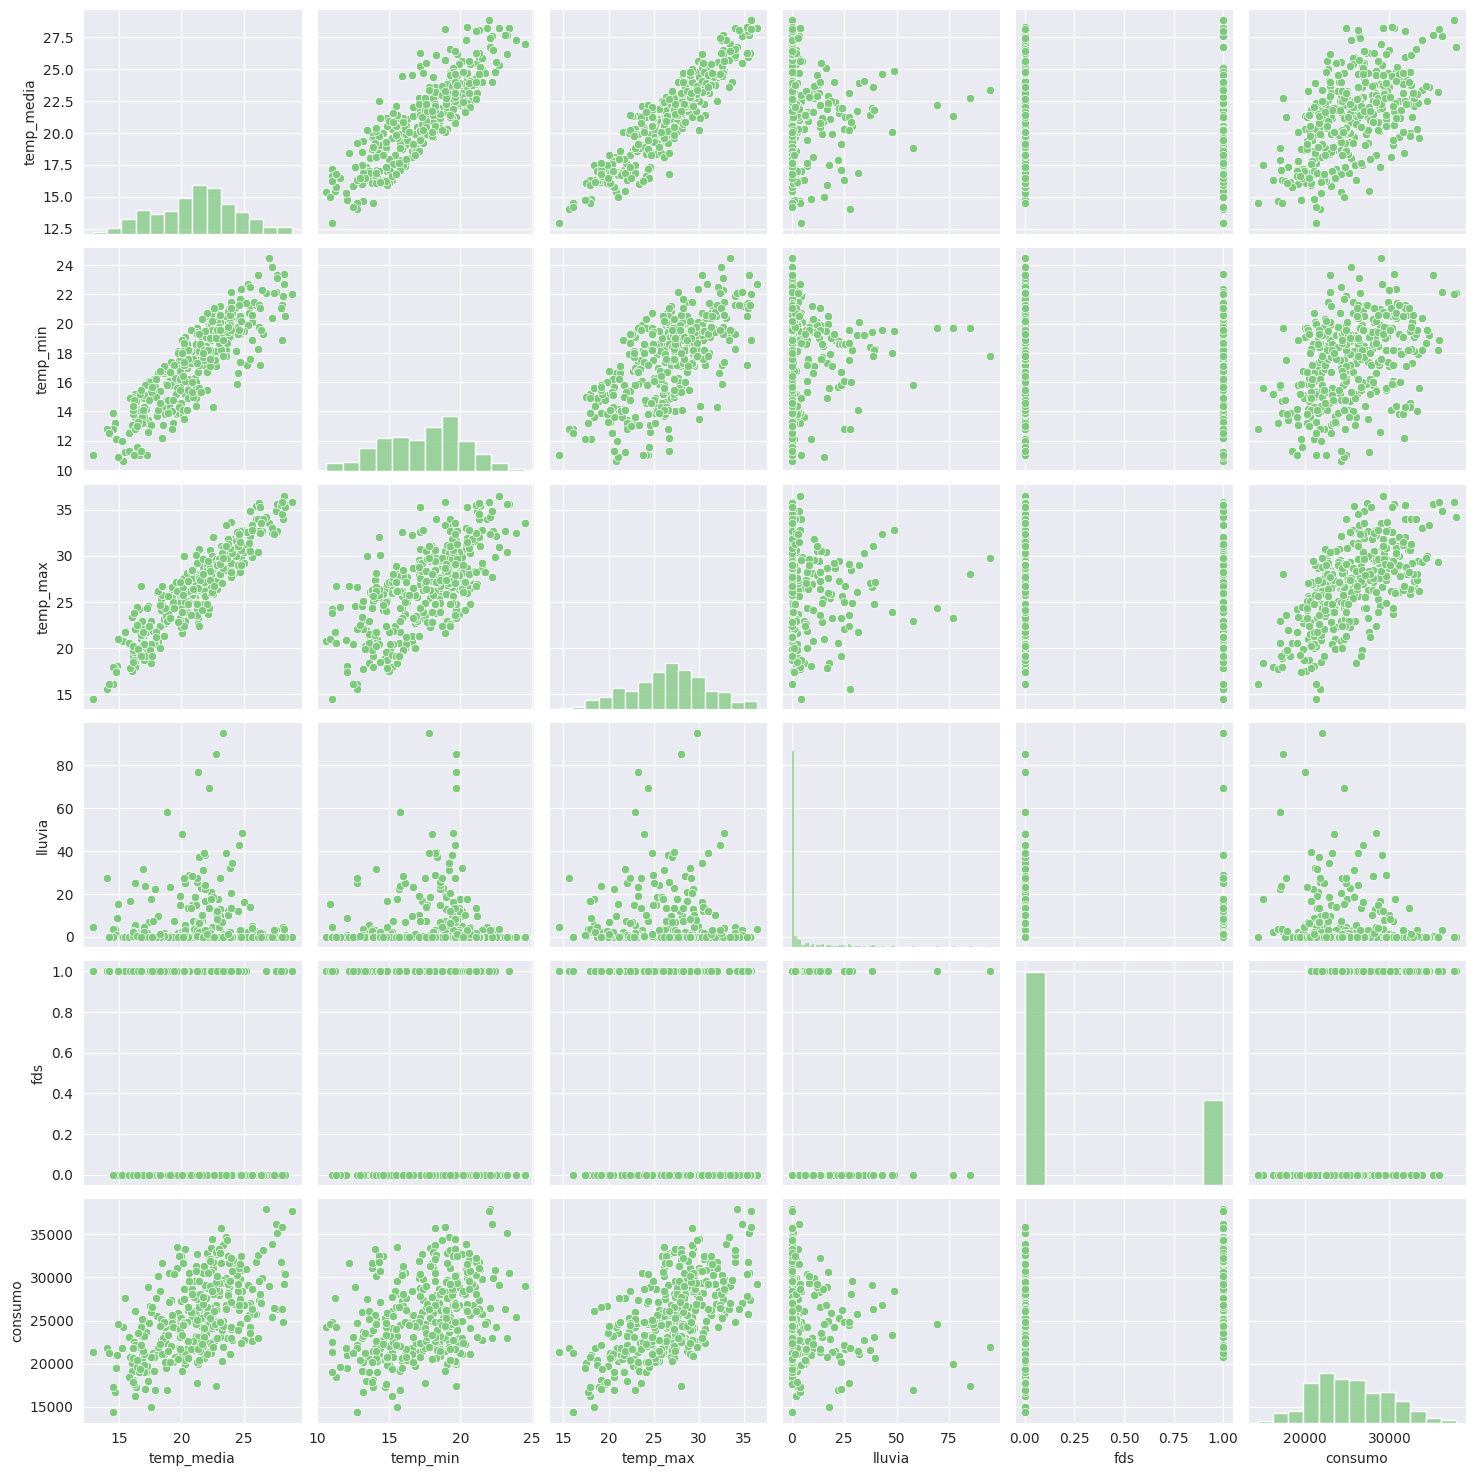

In [ ]:
# Como tenemos un dataframe con pocas variables podemos utilizar una sola matriz de correlación como la seguiente
# Pero en el caso de tener una dataframe con muchas variables tendriamos que trazar un scaterplot para cada variable
ax=sns.pairplot(consumo_cerveza_df)

**Observación:** De la matriz de correlación gráfica nos interesa solo la ultima fila de gráficos relacionados con la variable **consumo**

## Graficar el pairplot fijando solo una variable en el eje y.

Las siguientes herramientas de la biblioteca Seaborn: pairplot, jointplot y lmplot, permiten trazar el gráfico de dispersión del coeficiente de correlación entre dos y tres variables, generan gráficos de dispersión pero con ciertas características que nos serán útiles según en el caso donde necesitemos aplicarlas.

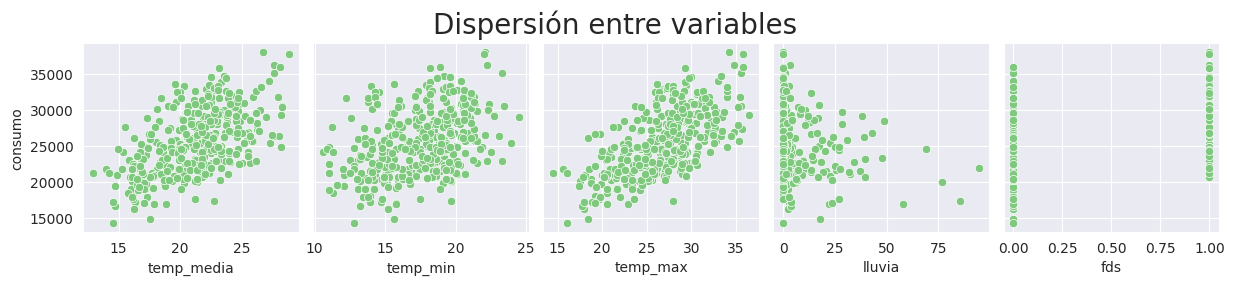

In [ ]:
ax=sns.pairplot(consumo_cerveza_df, y_vars='consumo', x_vars=['temp_media',	'temp_min',	'temp_max',	'lluvia',	'fds'],diag_kind=None	)
ax.fig.suptitle('Dispersión entre variables',fontsize=20, y=1.1)
ax

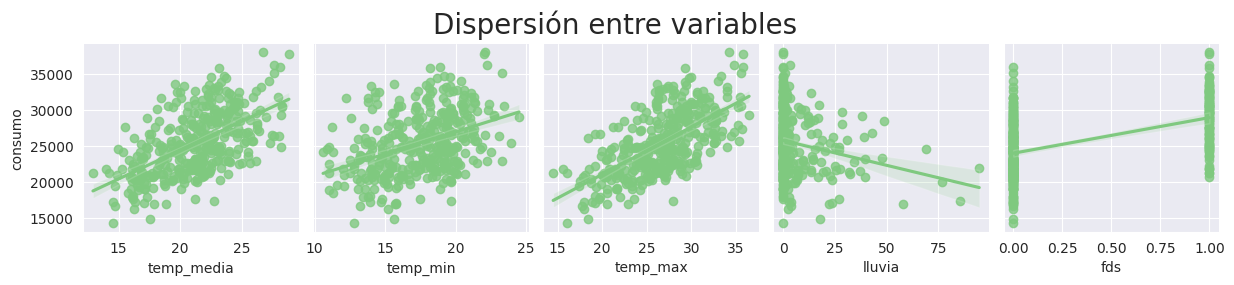

In [ ]:
# Trazemos la recta de regresión
ax=sns.pairplot(consumo_cerveza_df, y_vars='consumo', x_vars=['temp_media',	'temp_min',	'temp_max',	'lluvia',	'fds'],diag_kind=None, kind='reg')
ax.fig.suptitle('Dispersión entre variables',fontsize=20, y=1.1)
ax

# <font color='red' style='font-size: 30px;'>Variable Dependiente X Variables Explicativas (jointplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.jointplot

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Grafica la relación entre dos variables y sus respectivas distribuciones de frecuencia.</p>

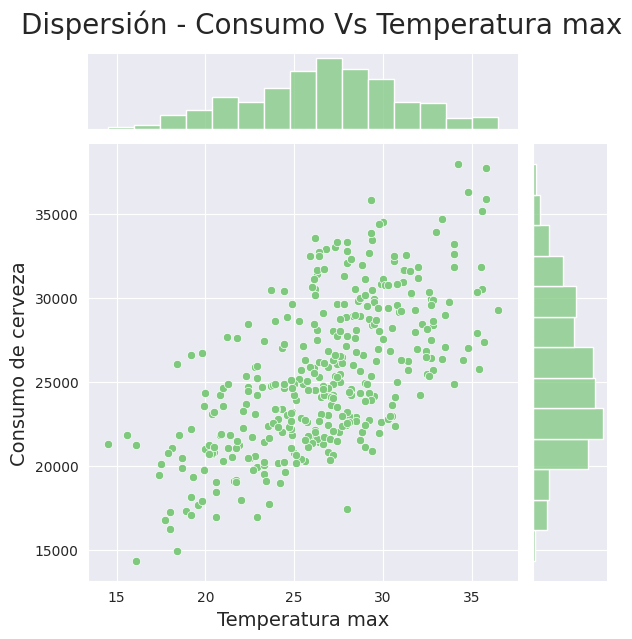

In [ ]:
ax=sns.jointplot(x='temp_max', y='consumo', data=consumo_cerveza_df)
ax.fig.suptitle('Dispersión - Consumo Vs Temperatura max',fontsize=20, y=1.05)
ax.set_axis_labels('Temperatura max','Consumo de cerveza', fontsize=14)
ax

## Graficar un jointplot con la recta de regresión estimada

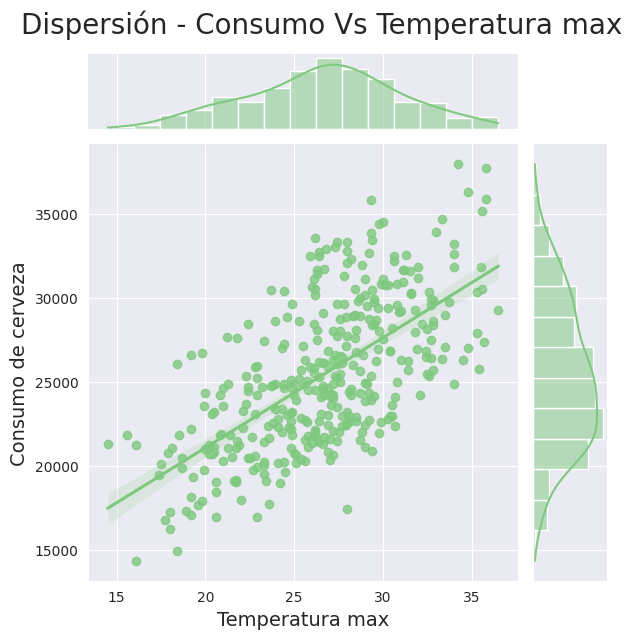

In [ ]:
ax=sns.jointplot(x='temp_max', y='consumo', data=consumo_cerveza_df, kind='reg')
ax.fig.suptitle('Dispersión - Consumo Vs Temperatura max',fontsize=20, y=1.05)
ax.set_axis_labels('Temperatura max','Consumo de cerveza', fontsize=14)
ax

# <font color='red' style='font-size: 30px;'>Variable Dependiente X Variables Explicativas (lmplot)</font>
<hr style='border: 2px solid red;'>

## seaborn.lmplot

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Trazar la recta de regresión entre dos variables junto con la dispersión entre ellas.</p>

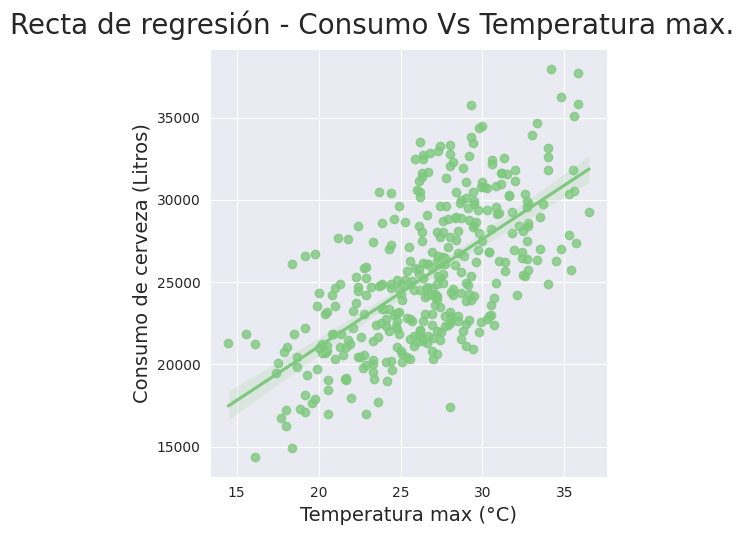

In [ ]:
ax=sns.lmplot(x='temp_max', y='consumo', data=consumo_cerveza_df)
ax.fig.suptitle('Recta de regresión - Consumo Vs Temperatura max.',fontsize=20, y=1.05)
ax.set_xlabels('Temperatura max (°C)', fontsize=14)
ax.set_ylabels('Consumo de cerveza (Litros)', fontsize=14)
ax

## Graficar un lmplot con una tercera variable en el análisis (tipo I - un solo gráfico).

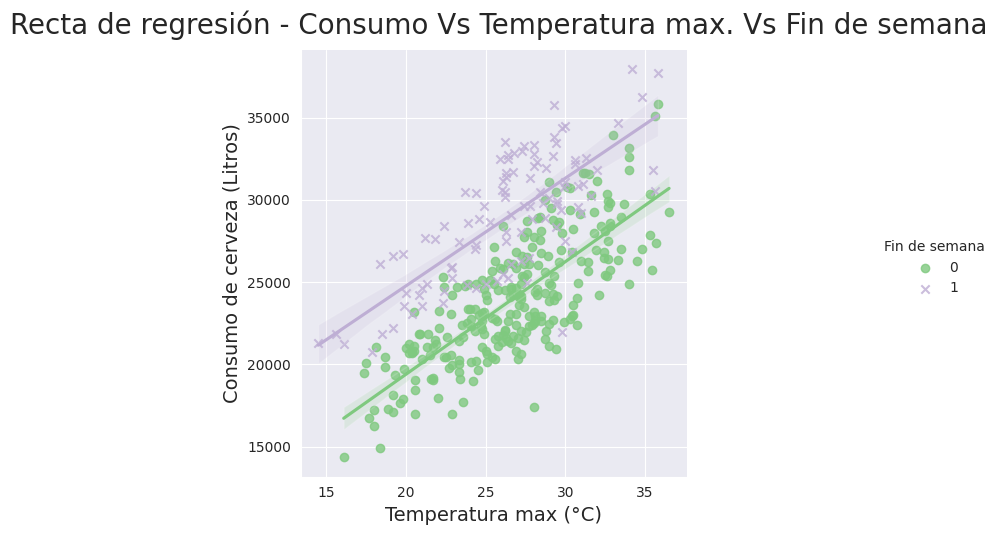

In [ ]:
ax=sns.lmplot(x='temp_max', y='consumo', data=consumo_cerveza_df, hue='fds',markers=['o','x'], legend=False)
ax.fig.suptitle('Recta de regresión - Consumo Vs Temperatura max. Vs Fin de semana',fontsize=20, y=1.05)
ax.set_xlabels('Temperatura max (°C)', fontsize=14)
ax.set_ylabels('Consumo de cerveza (Litros)', fontsize=14)
ax.add_legend(title='Fin de semana')
ax

**Observación:** Según el gráfico de dispersión podemos inferir que la tendencia de aumento de consumo de cerveza es más alta los días fines de semana ( Representados por equis) que los días no fines de semana (Representados por circulos verdes)

## Graficar un lmplot con una tercera variable en el análisis (tipo II - Dos gráficos separados).

En esta representación vamos a dividir la visualización de los datos en dos gráficos de dispersión separados, uno para cada valor de la misma variable categórica **fin_de_semana**

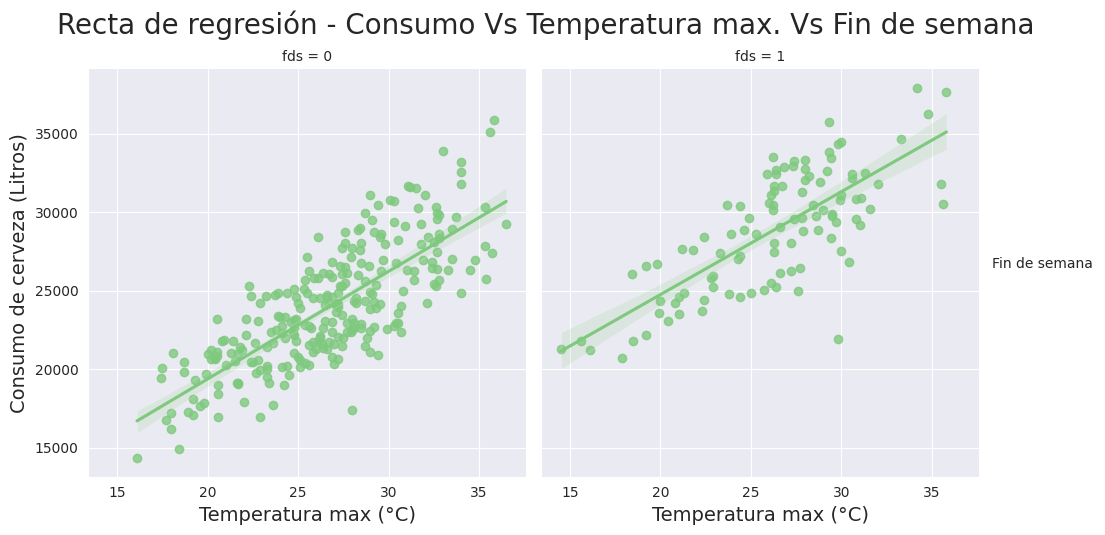

In [ ]:
ax=sns.lmplot(x='temp_max', y='consumo', data=consumo_cerveza_df, col='fds')
ax.fig.suptitle('Recta de regresión - Consumo Vs Temperatura max. Vs Fin de semana',fontsize=20, y=1.05)
ax.set_xlabels('Temperatura max (°C)', fontsize=14)
ax.set_ylabels('Consumo de cerveza (Litros)', fontsize=14)
ax.add_legend(title='Fin de semana')
ax

# <font color='red' style='font-size: 30px;'>Estimando un Modelo de Regresión Lineal para el Consumo</font>
<hr style='border: 2px solid red;'>

# Regresión Lineal
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b>scikit-learn</b> es un módulo de Python especializado en soluciones para <b>machine learning</b>.La biblioteca scikit-learn es de código abierto e incluye una serie de algoritmos para modelos de machine learning (clasificación, regresión, agrupación, etc.).</p>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>La técnica de separar aleatoriamente un dataset en dos conjuntos distintos (conjuntos de entrenamiento y de prueba), estimar el modelo con los datos de uno de estos conjuntos (conjunto de entrenamiento) y luego hacer estimaciones con los datos del segundo conjunto (conjunto de prueba) es una técnica ampliamente utilizada en data science, para confirmar la efectividad del modelo estimado.</p>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
Donde X es nuestro conjunto de variables explicativas, y es nuestra variable dependiente y `test_size es el porcentaje de la base que queremos separar para la prueba, en el caso actual en estudio, 30%.</p>
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>scikit-learn</b> proporciona la función <b>train_test_split</b> que hace esta separación, basta con que informemos los datos de nuestro modelo y cuál es el tamaño deseado de los conjuntos de entrenamiento y prueba.
Esta función devuelve, para el conjunto de variables explicativas (X), un conjunto de entrenamiento y uno de prueba (X_train y X_test), y para la variable dependiente (y), un conjunto de entrenamiento y otro de prueba (y_train y y_test).</p>



## Importando el *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Creando una Series (pandas) para almacenar el Consumo de Cerveza (y).

In [13]:
# Nos conviene más adelante tratar la variable fecha de tipo fecha y no de tipo cadena de caracteres
# consumo_cerveza_df['fecha'] = pd.to_datetime(consumo_cerveza_df['fecha'])
# consumo_cerveza_df.dtypes

In [26]:
# Por convención se usa la variable y en minúscula para almacenar la variable dependiente
# y = consumo_cerveza_df.drop(columns = ['fecha'])
y = consumo_cerveza_df['consumo']
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 365 entries, 0 to 364
Series name: consumo
Non-Null Count  Dtype
--------------  -----
365 non-null    int64
dtypes: int64(1)
memory usage: 3.0 KB


## Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [27]:
# Por convensión se usa la variable X en mayuscula para almacenar las variables explivativas
X=consumo_cerveza_df[['temp_max','lluvia','fds']]

## Creando los datasets de entrenamiento y de prueba

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2811)

In [29]:
X_train

,temp_max,lluvia,fds
195,27.6,0.0,0
344,30.3,0.0,0
288,35.7,0.0,0
59,26.3,3.0,1
220,26.2,0.0,1
...,...,...,...
73,26.8,0.3,1
68,26.9,9.7,0
215,27.4,0.0,0
341,28.0,0.0,0


## Comprobando los tamaños de los archivos generados por la función *train_test_split*.

In [73]:
# tamaño del conjunto de entrenamniento
X_train.shape

(255, 3)

In [74]:
# tamaño del conjunto de prueba
X_test.shape


(110, 3)

In [75]:
# Tamaño total del conjunto de datos X
X_train.shape[0]+X_test.shape[0]

365

In [76]:
# ¿Como calcula  train_test_split el tamaño del conjunto de prueba?
X.shape[0]*0.3

109.5

In [77]:
# ¿Como calcula train_test_split el tamaño del conjunto de entrenamiento?
X.shape[0]*0.7

255.49999999999997

De los dos cálculos anteriores inferimos que el metodo **train_test_split** hace un ajuste para trabajar con números enteros en los tamaños de los conjuntos de entrenamiento y prueba respectivamente

<img width='1000px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/reg_01.jpg'>

## Importando *LinearRegression* y *metrics* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando la clase *LinearRegression()*

In [79]:
modelo = LinearRegression()

## Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [80]:
modelo.fit(X_train,  y_train)

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinación - R²

El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [81]:
print('R²={}'.format(modelo.score(X_train,  y_train).round(2)))

R²=0.73


## Generando predicciones para los datos de ENTRENAMIENTO (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [82]:
y_predicho= modelo.predict(X_test)
y_predicho

array([26094.90177526, 25056.13191497, 23852.14792684, 29361.63643926,
       25603.92132216, 28890.65776528, 20484.03383301, 28965.58342859,
       21023.87627737, 29575.39452427, 28342.86835809, 28548.28938579,
       25321.09612517, 22225.89320436, 20544.69824707, 30719.97303089,
       23275.81634161, 26634.25245434, 29430.11011516, 19920.60622259,
       23274.57708862, 23070.39531392, 17226.09529035, 20676.55088589,
       25595.58426485, 25530.98239956, 21285.12272857, 25809.34234985,
       21894.18633654, 27863.55262681, 22600.85923454, 23823.97949265,
       23960.5531006 , 20057.55357439, 29361.63643926, 23823.6057488 ,
       31347.37304031, 22909.13498792, 25809.34234985, 31172.22520894,
       31895.1624475 , 22842.27430887, 25193.07926677, 25457.31566882,
       27110.34219192, 30699.85323034, 25261.55294267, 30920.65673884,
       28274.3946822 , 20536.86930568, 31895.1624475 , 26220.18440524,
       34154.79375215, 19843.20205329, 26151.71072935, 27932.0263027 ,
      

## Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [83]:
print('R²={}'.format(metrics.r2_score(y_test,y_predicho).round(2)))

R²=0.69


# <font color='red' style='font-size: 30px;'>Obteniendo Predicciones Puntuales</font>
<hr style='border: 2px solid red;'>

## Datos de entrata

In [84]:
entrada_df=X_test[0:1]
entrada_df

,temp_max,lluvia,fds
5,30.5,12.2,0


## Generando predicción puntual

In [85]:
modelo.predict(entrada_df)

array([26094.90177526])

## Creando un simulador simple

# <font color='red' style='font-size: 30px;'>Interpretación de los Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

<img width='1000px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/reg_02.jpg'>

## Obteniendo el intercepto del modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El <b> intercepto </b> representa el efecto medio en $ Y $ (Consumo de cerveza) con todas las variables explicativas excluidas del modelo. Dicho de otra forma, el <b> intercepto </b> representa el efecto medio en $ Y $ (consumo de cerveza) cuando $ X_2 $ (temperatura máxima), $ X_3 $ (lluvia) y $ X_4 $ (fin de semana ) son iguales a cero.</p>

In [44]:
modelo.intercept_

5951.976339312445

## Obteniendo los coeficientes de regresión

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Los <b> coeficientes de regresión </b> $\beta_2 $, $\beta_3 $ y $\beta_4 $ son conocidos como <b> coeficientes de regresión parcial </b> o <b> coeficientes angulares parciales </b> . Considerando el número de variables explicativas en nuestro modelo, su significado sería el siguiente: $ \beta_2 $ mide la variación en el valor medio de $ Y $ (Consumo de cerveza) por variación unitaria en $ X_2 $ (Temperatura máxima), manteniéndose constantes los valores de $ X_3 $ (Lluvia) y $ X_4 $ (Fin de semana). En otras palabras, $ \beta_2 $ nos da el efecto "directo" o "neto" de una unidad de variación en $ X_2 $ sobre el valor medio de $ Y $, excluyendo los efectos que pueden tener $ X_3 $ y $ X_4 $ en el promedio de $ Y $. Del mismo modo podemos interpretar los demás coeficientes de regresión.</p>

## Confirmando el orden de las variables explicativas en el DataFrame

In [45]:
X.columns

Index(['temp_max', 'lluvia', 'fds'], dtype='object')

## Creando una lista de nombres de las variables del modelo

In [46]:
index = ['Intercepto','Temperatura máxima','LLuvia (mm)','Fin de semana']

## Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [47]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index = index, columns=['Parámetros'])

,Parámetros
Intercepto,5951.976339
Temperatura máxima,684.736759
LLuvia (mm),-60.782435
Fin de semana,5401.083339


## Interpretación de los coeficientes estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluyendo el efecto de las variables explicativas ($ X_2 = X_3 = X_4 = 0 $) el efecto medio en el Consumo de Cerveza sería <b> 5951,98 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Temperatura Máxima (°C) </b> → Manteniendo constantes los valores de $ X_3 $ (Lluvia) y $ X_4 $ (Fin de Semana), el aumento de 1°C en la Temperatura Máxima genera una variación media en el Consumo de Cerveza de <b> 684,74 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Lluvia (mm) </b> → Manteniendo constantes los valores de $ X_2 $ (Temperatura Máxima) y $ X_4 $ (Fin de Semana), la adición de 1 mm de Lluvia genera una variación media en el Consumo de Cerveza de <b > -60,78 litros</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Fin de semana (Sí / No) </b> → Manteniendo constantes los valores de $ X_2 $ (Temperatura máxima) y $ X_3 $ (Lluvia), el hecho de que el día se clasifique como Fin de semana genera una variación media en el consumo de cerveza de <b> 5401,08 litros</b>.
</p>

# <font color='red' style='font-size: 30px;'>Análisis gráfico de las predicciones del modelo</font>
<hr style='border: 2px solid red;'>

## Generando predicciones del modelo para los datos de ENTRENAMIENTO

In [48]:
y_predicho_train = modelo.predict(X_train)

## Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: title={'center': 'Predicción X real'}, xlabel='Consumo de cerveza (Lts) -  Predicción', ylabel='Consumo de cerveza (Lts) -  Real'>

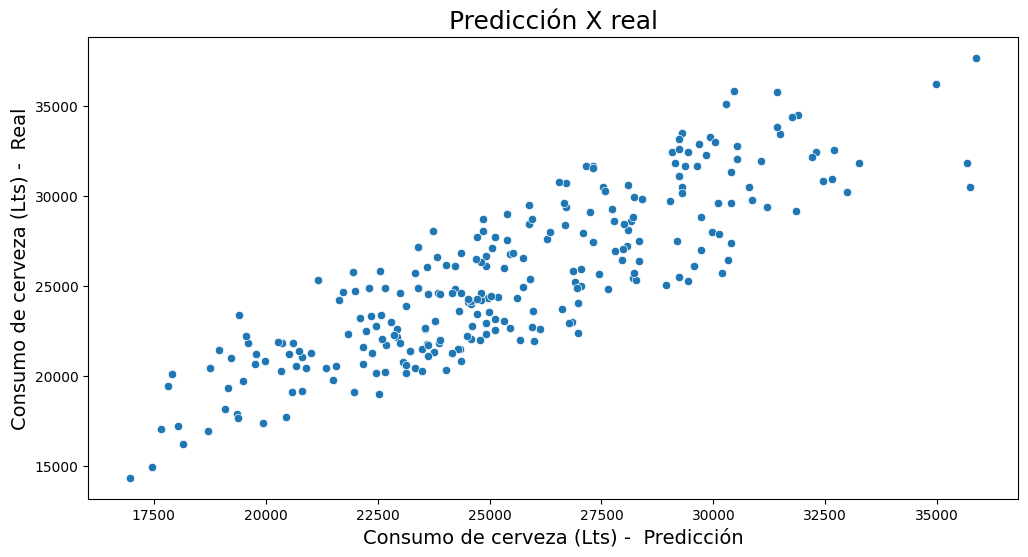

In [49]:
ax = sns.scatterplot(x= y_predicho_train, y = y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Predicción X real', fontsize=18)
ax.set_xlabel('Consumo de cerveza (Lts) -  Predicción', fontsize = 14)
ax.set_ylabel('Consumo de cerveza (Lts) -  Real', fontsize = 14)
ax


## Obteniendo los residuos

In [ ]:
residuo = y_train - y_predicho_train

<Axes: title={'center': 'Residuos Vs Predicción'}, xlabel='Consumo de cerveza (Lts) -  Predicción', ylabel='Residuos'>

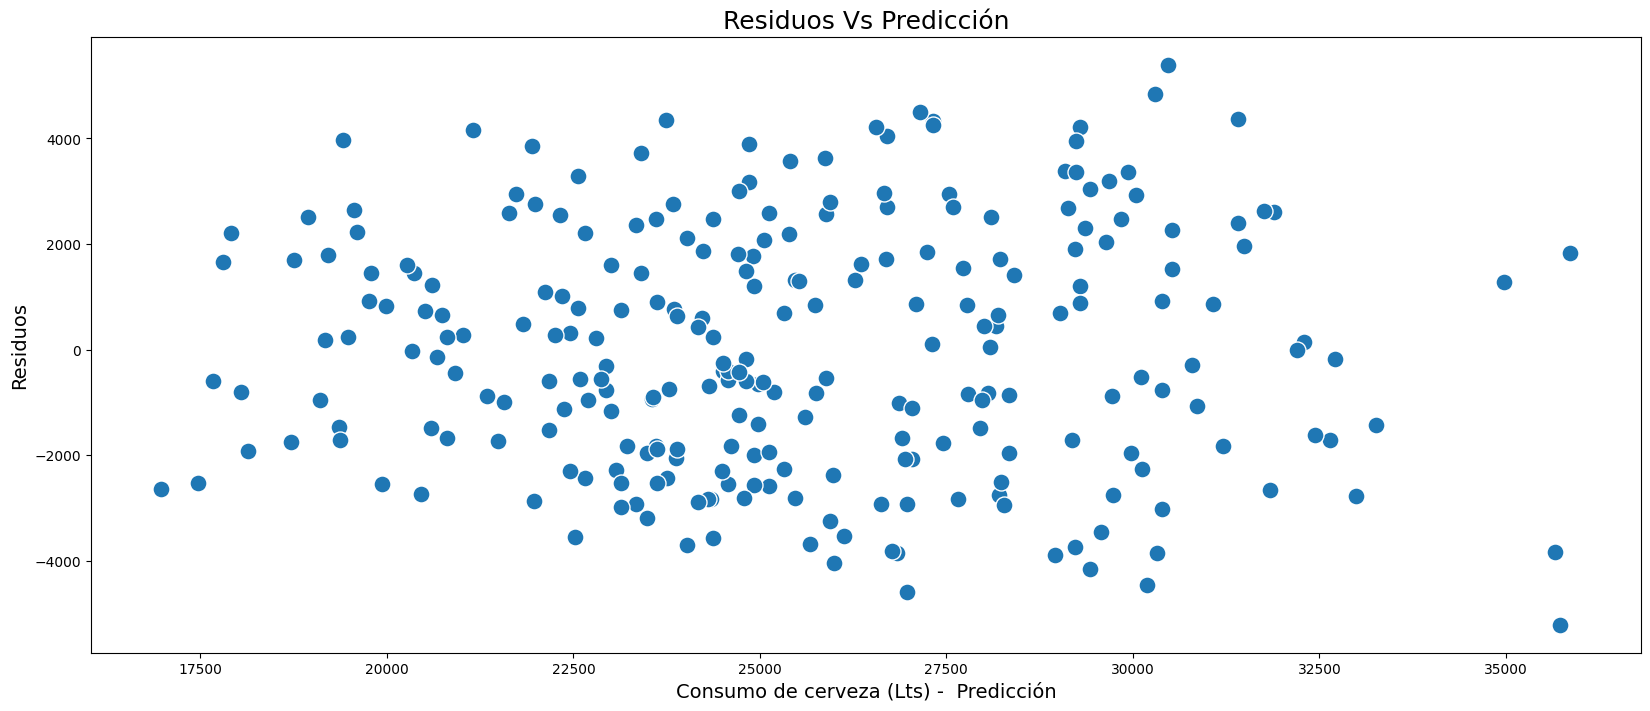

In [55]:
ax = sns.scatterplot(x= y_predicho_train, y = residuo, s=150)
ax.figure.set_size_inches(20,8)
ax.set_title('Residuos Vs Predicción', fontsize=18)
ax.set_xlabel('Consumo de cerveza (Lts) -  Predicción', fontsize = 14)
ax.set_ylabel('Residuos', fontsize = 14)
ax


## Gráfico de dispersión entre valor estimado y residuos

Método informal para verificar la hipótesis de varianza constante de los residuos (homocedasticidad)

## Usando los residuos al cuadrado

<img width='1500px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/var_u.jpg'>
Fuente: Econometria Básica - 5ª edición - Gujarati y Porter

<Axes: title={'center': 'Residuos Vs Predicción'}, xlabel='Consumo de cerveza (Lts) -  Predicción', ylabel='Residuos'>

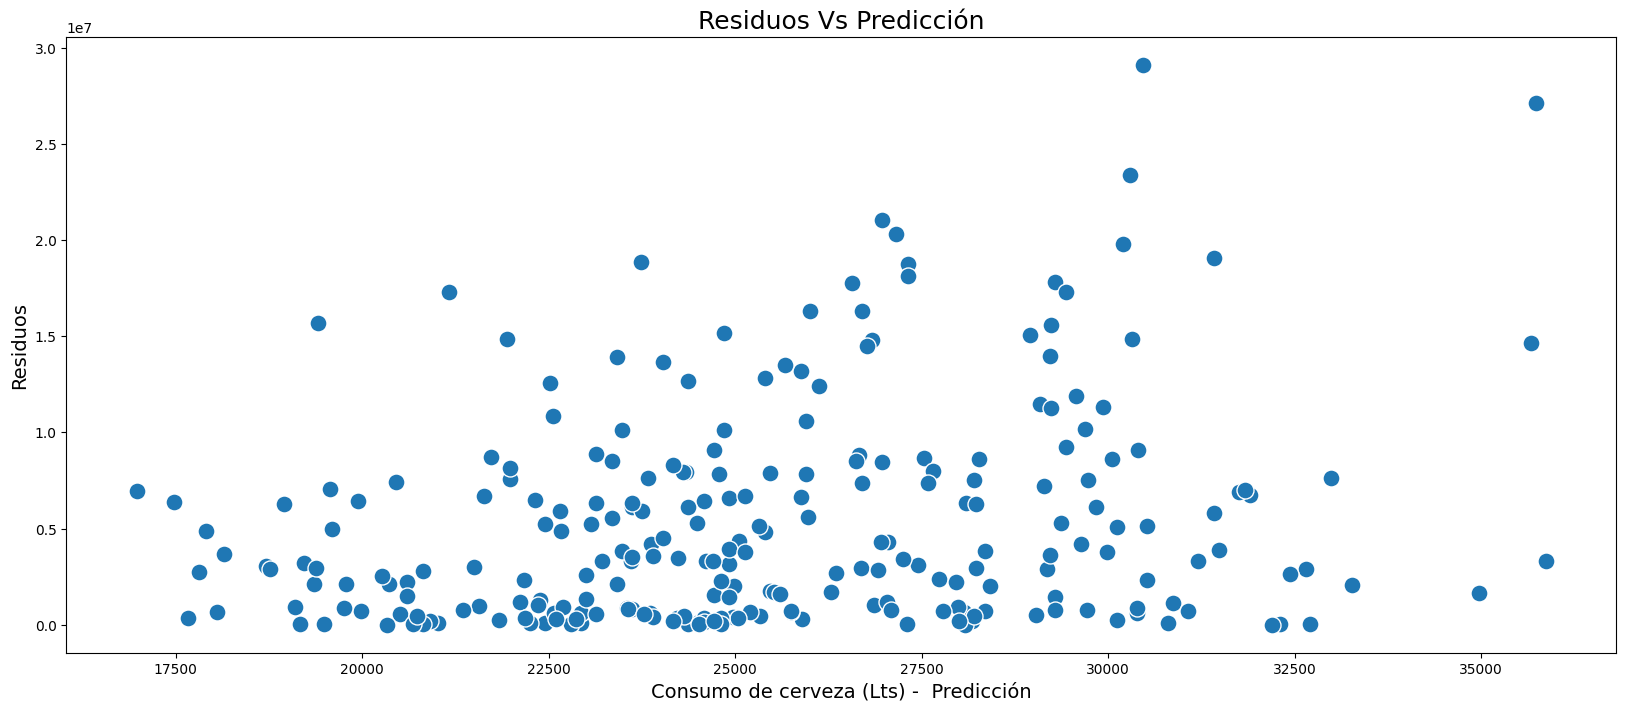

In [54]:
ax = sns.scatterplot(x= y_predicho_train, y = residuo**2, s=150)
ax.figure.set_size_inches(20,8)
ax.set_title('Residuos Vs Predicción', fontsize=18)
ax.set_xlabel('Consumo de cerveza (Lts) -  Predicción', fontsize = 14)
ax.set_ylabel('Residuos', fontsize = 14)
ax


## Graficando la distribuición de frecuencias de los residuos

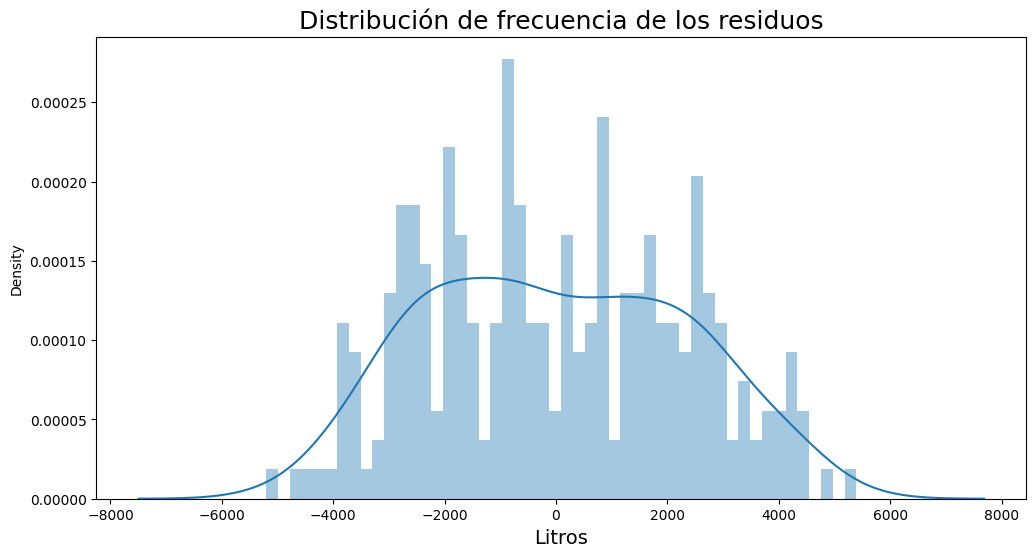

In [63]:
ax = sns.distplot(residuo, bins= 50)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribución de frecuencia de los residuos', fontsize=18, )
ax.set_xlabel('Litros', fontsize = 14)
ax;


aumentando el número de barras con bins=50 podemos observar espacios vacios en la distribución y no podemos decir que los residuos tengan una distribución normal

**Los pasos:**
- Importar la función train_test_split de la biblioteca scikit-learn
- Crear una Series, a partir de `pandas´, para almacenar la variable consumo de cerveza
- Crear un DataFrame, a partir de pandas, para almacenar las variables explicativas
- Crear los datasets de entrenamiento y prueba
- Verificar los tamaños de los archivos generados por la función train_test_split
- Estimar un modelo de regresión lineal
- Obtener predicciones puntuales
- Interpretar los coeficientes estimados
- Analizar las predicciones gráficamente

**Lo mas importante:**
- Cómo preparar los datos y crear datasets de entrenamiento y prueba
- Cómo verificar los tamaños de los archivos generados por la función train_test_split
- Cómo estimar un modelo de regresión lineal
- Cómo obtener predicciones puntuales
- Cómo interpretar los coeficientes estimados
- Cómo analizar gráficamente las predicciones

# <font color='red' style='font-size: 30px;'>Comparando Modelos</font>


<hr style='border: 2px solid red;'>

## Estimación de un nuevo modelo con la sustitución de la variable explicativa Temperatura máxima por Temperatura media.

Dado que la comparación entre modelos solo tiene sentido cuando mantenemos la misma variable dependiente, no tendría sentido mantener también el mismo conjunto de variables explicativas. Estaríamos comparando modelos idénticos.

In [66]:
# Por convensión se usa la variable X en mayuscula para almacenar las variables explivativas
X2=consumo_cerveza_df[['temp_media','lluvia','fds']]

## Creando los datasets de entrenamiento y de prueba

In [67]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3,random_state=2811)

## Instanciar la clase *LinearRegression()*

In [69]:
modelo2 = LinearRegression()

## Usando el método *fit()* del objeto "modelo_2" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y2_train e X2_train)

In [70]:
modelo2.fit(X2_train,  y2_train)

LinearRegression()

## Obteniendo el coeficiente de determinación (R²) del nuevo modelo estimado y comparando con el resultado del modelo anterior

In [71]:
print('Modelo con temperatura media')
print('R²={}'.format(modelo2.score(X2_train,  y2_train).round(2)))

Modelo con temperatura media
R²=0.66


In [86]:
print('Modelo con temperatura maxima')
print('R²={}'.format(modelo.score(X_train,  y_train).round(2)))

Modelo con temperatura maxima
R²=0.73


## Generando predicciones para los datos de PRUEBA (X_test e X2_test) con el método *predict()* de los objetos "modelo" e "modelo_2"

In [88]:
y_predicho_2 = modelo2.predict(X2_test)

## Obteniendo el coeficiente de determinación (R²) para las predicciones de los dos modelos

Los valores más altos de R² indican un mejor ajuste del modelo. R² es una métrica que nos dice qué parte de la variación en la variable dependiente se explica por nuestro ajuste. Los valores más cercanos a 1 indican modelos mejor ajustados.

In [91]:
print('Modelo para temperatura media')
print('R²={}'.format(metrics.r2_score(y2_test,y_predicho_2).round(2)))

Modelo para temperatura media
R²=0.66


In [89]:
print('Modelo para temperatura maxima')
print('R²={}'.format(metrics.r2_score(y_test,y_predicho).round(2)))

Modelo para temperatura maxima
R²=0.69


# <font color='red' style='font-size: 30px;'>Otras Métricas de Regresión</font>
<hr style='border: 2px solid red;'>

## Métricas da regresión
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algunas estadísticas obtenidas del modelo de regresión son muy útiles como criterio para comparar varios modelos estimados y seleccionar el mejor modelo. Las principales métricas de regresión que scikit-learn pone a disposición para los modelos lineales son las siguientes:

### Error Cuadrático Medio

Media de los cuadrados de los errores. Los mejores ajustes tienen un $EQM$ más bajo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz del Error Cuadrático Medio

Raíz cuadrada de la media de los cuadrados de los errores. Los mejores ajustes tienen un $\sqrt{EQM}$ más bajo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



## Obteniendo métricas para el modelo con Temperatura Media

In [92]:
EQM_2 = metrics.mean_squared_error(y2_test, y_predicho_2).round()
REQM_2 =np.sqrt(EQM_2).round(2)
R2_2 = metrics.r2_score(y2_test, y_predicho_2).round(2)
pd.DataFrame([EQM_2,REQM_2,R2_2],['EQM_2','REQM_2','R2_2'], columns=['Métricas'])

,Métricas
EQM_2,6060775.00
REQM_2,2461.86
R2_2,0.66


## Obteniendo métricas para el modelo con Temperatura Máxima

In [93]:
EQM = metrics.mean_squared_error(y_test, y_predicho).round()
REQM =np.sqrt(EQM).round(2)
R2 = metrics.r2_score(y_test, y_predicho).round(2)
pd.DataFrame([EQM,REQM,R2],['EQM','REQM','R2'], columns=['Métricas'])

,Métricas
EQM,5471976.00
REQM,2339.23
R2,0.69


**las tres métricas de regresión**: Coeficiente de determinación; Error cuadrático medio; y Raíz del error cuadrático medio

**Los pasos:**

- Estimar un nuevo modelo, pero esta vez usando la variable explicativa Temperatura Media en lugar de Temperatura Máxima
- Crear los conjuntos de entrenamiento y prueba para este nuevo modelo
- Estimar el modelo lineal usando datos de entrenamiento
- Obtener el coeficiente de determinación (R²) del nuevo modelo estimado y compararlo con el resultado del modelo anterior.
- Generar pronósticos para los datos de prueba de los dos modelos
- Obtener el coeficiente de determinación (R²) para los pronósticos de los dos modelos
- Calcular el error cuadrático medio, su raíz y el coeficiente de determinación de los dos modelos.

**Lo importante de esta sección:**

- Cómo estimar un nuevo modelo, pero esta vez usando otra variable explicativa
- Cómo crear los conjuntos de entrenamiento y prueba del nuevo modelo
- Cómo comparar los dos modelos
- Otras métricas de regresión: error cuadrático medio y su raíz

# <font color='red' style='font-size: 30px;'>Guardando y cargando el modelo estimado</font>
<hr style='border: 2px solid red;'>

## Datos de entrada

In [123]:
entrada = X_test[0:1]


## Generando predicción puntual

In [105]:
consumo_estimado = modelo.predict(entrada)[0]

In [124]:
print(f' el consumo estimado es de {consumo_estimado.round(2)} litros')

 el consumo estimado es de 26094.9 litros


## Creando un simulador simple

In [131]:
temp_max = 30.5
lluvia = 12.2
fds = 0
entrada = [[temp_max,lluvia,fds]]
consumo_estimado = modelo.predict(entrada)[0]
print('{} litros'. format(consumo_estimado.round(2)))

26094.9 litros


## Guardando el modelo estimado

## pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El módulo <b> pickle </b> implementa protocolos binarios para serializar y deserializar la estructura de un objeto Python.</p>

In [130]:
import pickle
ruta_modelo = '/content/drive/MyDrive/Colab Notebooks/231102-1_machine_learning_regresion_lineal_correlaciones/modelo_consumo_cerveza'
output = open(ruta_modelo,'wb')
pickle.dump(modelo, output)
output.close()

### En un nuevo notebook/proyeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_consumo_cerveza','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, lluvia, fds]]
print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
26094.90 litros
```

**Lo importante de esta sección:**
- Guardar el modelo estimado usando la biblioteca pickle
- Cargar el modelo estimado en un nuevo notebook, también usando la biblioteca pickle